# Ajuste de Funções

Função a ser ajusta: reta $y = ax+b$. Parâmetros a serem obtidos: $a=$ coeficiente angular e $b=$ coeficiente linear.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #funcao a ser usada para fazer o ajuste
import random #gerador de numeros aleatorios

Como nosso objetivo é aprender o método, vamos gerar os dados a serem ajustados. Para isso escolhemos os seguintes parâmetros de uma reta.

In [2]:
a = 5 #coeficiente angular
b = 10 #coeficiente linear

In [3]:
x = np.arange(10) #vetor com 10 componentes
y = a*x+b #vetor cuja cada componente e a operacao em questao

In [4]:
x #mostrando os valores gerados

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
y

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

Sempre é importante visualizar as variáveis criadas. No caso fazemos um gráfico.

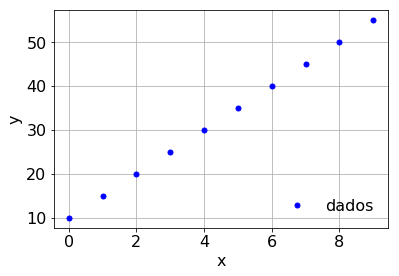

In [7]:
plt.plot(x,y,'ob',ms = 5,label = 'dados') 
#'ob' significa que os marcadores serao circulo
#e a cor sera azul (de blue)
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
#plt.title(titulo,fontsize=14)
plt.grid(True)
plt.legend(loc='lower right',fontsize = 16,frameon = False)
plt.yticks(size=16)
plt.xticks(size=16)
axes = plt.gca()
#axes.set_xlim([0.16,0.17])
#axes.set_ylim([1e-3,5e-2])
plt.savefig('figura1.png',dpi = 300, bbox_inches='tight')
plt.show()
plt.close()

A função que usaremos para ajuste curve_fit necessita da função a ser ajustada como sendo um parâmetro. Por isso criamos a função que gera uma reta.

In [9]:
def cria_reta(x,a,b):
    return x*a+b

Para fazer o ajuste precisamos definir um chute, que é um valor inicial dos parâmetros desejados. Como criamos os dados a serem ajustados, escolhemos valores próximos aos usados.

In [10]:
chute = [6,11]
parametros, erros = curve_fit(cria_reta, x, y, chute)

Os valores ajustados dos parâmetros são os elementos da matriz:

In [11]:
parametros

array([ 5., 10.])

Já os erros são os elementos da diagonal da matriz:

In [12]:
erros

array([[ 0., -0.],
       [-0.,  0.]])

Agora vamos complicar a situação pela adição de um ruído nos dados gerados. Assim os dados não serão exatamente uma reta.

In [14]:
nx = len(x)
am = 5
y2 = np.zeros(nx)
for i1 in range(nx):
    y2[i1] = a*x[i1]+b+am*(2*random.random()-1)

O ruído é gerado por um número aleatório. random.random() é um número aleatório entre 0 e 1, enquanto que (2*random.random()-1) é um número aleatório entre -1 e 1. Assim o ruído é aleatório com uma amplitude amp em torno da reta $ax+b$.

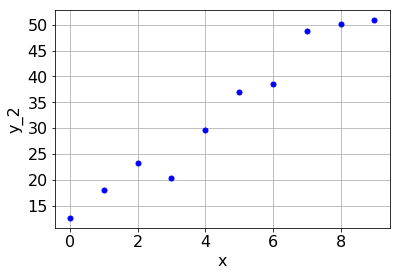

In [16]:
plt.plot(x,y2,'ob',ms = 5,label = 'dados+ruido')
plt.xlabel('x',fontsize = 16)
plt.ylabel('y_2',fontsize = 16)
#plt.title(titulo,fontsize=14)
plt.grid(True)
#plt.legend(loc='lower right',fontsize = 16,frameon = False)
plt.yticks(size=16)
plt.xticks(size=16)
axes = plt.gca()
#axes.set_xlim([0.16,0.17])
#axes.set_ylim([1e-3,5e-2])
plt.savefig('figura2.png',dpi = 300, bbox_inches='tight')
plt.show()
plt.close()

Fazendo o ajuste para a nova função: reta $+$ ruído.

In [20]:
pa, erros = curve_fit(cria_reta, x, y2, [3,15])

Os parâmetros obtidos são:

In [21]:
pa

array([ 4.59629484, 12.23573448])

Veja que agora o coeficiente angular não é 5.0, e sim 4.59..., por influência do ruído acrescentado. Os erros também são maiores que zero também (elementos da diagonal).

In [19]:
erros

array([[ 0.10826418, -0.48718879],
       [-0.48718879,  3.08552899]])

Vamos fazer o gráfico com a função ajustada com ruído. Primeiro criamos o vetor $y$ com os parâmetros obtidos. Veja que utilizo a mesma função.

In [22]:
y3 = cria_reta(x,pa[0],pa[1])

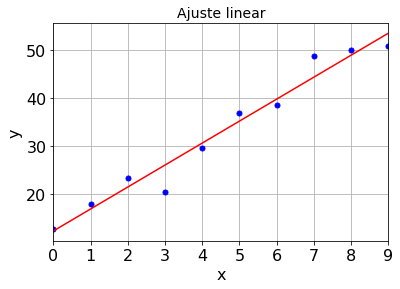

In [24]:
plt.plot(x,y2,'ob',ms = 5,label = 'dados+ruido')
plt.plot(x,y3,'-r',lw = 1.5,label = 'ajuste')
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.title('Ajuste linear',fontsize=14)
plt.grid(True)
#plt.legend(loc='lower right',fontsize = 16,frameon = False)
plt.yticks(size=16)
plt.xticks(size=16)
axes = plt.gca()
axes.set_xlim([0,9])
#axes.set_ylim([1e-3,5e-2])
plt.savefig('figura3.png',dpi = 300, bbox_inches='tight')
plt.show()
plt.close()

É nítido agora a influência do ruído, criando um desvio entre a reta ajustada e os dados.